## HSV space equalization

In [8]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [25]:
import cv2
import numpy as np
import argparse
import os
import matplotlib.pyplot as plt

In [26]:
img = cv2.imread('src0705.jpg')

In [27]:
hist, bins = np.histogram(img.flatten(), 256,[0,256])

In [28]:
cdf = hist.cumsum()

In [29]:
cdf_m = np.ma.masked_equal(cdf,0)

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

In [31]:
cdf = np.ma.filled(cdf_m,0).astype('uint8')

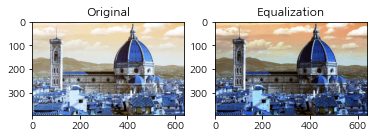

In [32]:
img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img2),plt.title('Equalization')
plt.show()

# 코드참고

In [7]:
import cv2 as cv
im = cv.imread('src0705.jpg')
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(im, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv)

In [8]:
hsv2 = []
for i in [h,s,v]:
    hsv2.append(cv.equalizeHist(i))


In [13]:
change_v = cv.merge([h, s, hsv2[2]])
change_sv = cv.merge([h, hsv2[1], hsv2[2]])
change_hsv = cv.merge(hsv2)

In [ ]:
im = 